In [1]:
#Loading the data set - training data.
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', 
'#137e6d', '#be0119', '#3b638c', '#af6f09', '#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', 
'#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

cmap = mcolors.LinearSegmentedColormap.from_list("", ["#82cafc", "#069af3", "#0485d1", colors[0], colors[8]])

In [3]:
# You can check the target names (categories) and some data files by following commands.
twenty_train.target_names 

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
twenty = twenty_train.data + twenty_test.data

In [5]:
import numpy as np
t = np.array(list(twenty_train.target) + list(twenty_test.target))

In [6]:
print("\n".join(twenty[0].split("\n")[:3])) #prints first line of the first data file

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(twenty)
X_counts.shape

(18846, 173762)

In [40]:
l = np.array([X_counts[2,i] for i in range(X_counts.shape[1])]).squeeze()
print('{0:3d} termini diversi nel documento, {1:5.3f}% di tutto il vocabolario'.format(l.sum(), 
                l.sum()/X_counts.shape[1]*100))
print(np.argwhere(l == 1).reshape(1,-1)[0])

308 termini diversi nel documento, 0.177% di tutto il vocabolario
[  4706   8297   8868  17128  21119  28216  35817  36078  36470  36499
  36960  37347  38420  39151  39708  39933  40223  41268  41791  43584
  44769  45618  46354  48192  51843  57996  58257  61144  61278  64425
  65086  66575  67065  68155  69193  69514  70036  72245  74086  74689
  74842  74843  75864  76869  78631  79328  79560  80583  80702  81221
  82991  83757  83899  84479  84530  85412  86167  89614  91114  91459
  91522  92522  98366 101885 101896 101987 102119 102149 102572 103041
 103045 105625 105726 105784 106249 106857 107497 110068 111988 113545
 114471 116373 116508 116572 116661 117020 120552 120583 121189 121707
 123993 124584 124679 125736 126440 126657 127449 128163 128421 128630
 129249 131721 133075 133587 133616 133644 133859 137721 138332 143626
 143831 145186 145262 145363 145367 147186 148466 148469 148929 148932
 149305 149831 151042 152565 152765 152997 153157 153487 154118 155589
 158656 159

In [29]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)
X_tfidf.shape

(18846, 173762)

In [74]:
#l1 = np.array([X_tfidf[1,i] for i in range(X_counts.shape[1])])
l_ind = np.argwhere(l1 > 0).reshape(1,-1)[0]
print(l_ind)
l_val = l1[l_ind]
print(l_val)

[  4077  10582  28063  36042  36609  36634  39315  39712  40752  41194
  42006  44282  44769  48085  48304  51672  52181  52333  55524  58835
  61643  61664  63419  64759  65867  68505  71110  72296  73349  74835
  75517  75520  75985  76869  77256  82177  82182  83893  83899  84260
  86318  86392  88645  89701  97293  98378  99227 102149 109080 116373
 116661 117497 118481 119845 120502 121189 121445 124607 126480 127051
 127481 128682 133071 135217 135323 141697 142443 142610 143170 143686
 144959 145478 145920 148466 148928 148929 152565 152603 152659 152962
 153971 154271 156290 158656 159289 159292 159588 164339 165435 165681
 166050 171315 171340]
[0.05102844 0.14403287 0.07193239 0.09625402 0.10383216 0.12477323
 0.05037655 0.08296212 0.02337598 0.02496492 0.11860944 0.0681623
 0.02235222 0.09726796 0.08617634 0.10325324 0.06984621 0.17676731
 0.36587506 0.07683054 0.04911357 0.05630008 0.10658706 0.06331586
 0.05170055 0.06033003 0.058361   0.16149499 0.07371421 0.13687035
 0.0

In [75]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
k = 1000
#fs = SelectKBest(mutual_info_classif, k=k).fit(X_tfidf, t)

In [76]:
import numpy as np
np.savetxt('scores_tc_features', fs.scores_)

In [77]:
fscores = np.loadtxt('scores_tc_features')

In [78]:
#fscores = fs.scores_
idx = np.argsort(fscores)[::-1]

In [79]:
fscores[idx[:20]]

array([2.99018358, 2.99018358, 2.98271296, 2.88723406, 2.80936538,
       2.69492428, 2.6357423 , 2.55218158, 2.50209071, 2.29642973,
       2.18649085, 2.1568045 , 2.1509221 , 2.12864069, 1.98754603,
       1.83845163, 1.80055339, 1.77842258, 1.74573683, 1.70177701])

In [80]:
n_terms = 30000
X_red = X_tfidf[:,idx[:n_terms]]

In [81]:
X_red.shape

(18846, 30000)

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(X_red, t, test_size=0.3)

In [83]:
# Machine Learning
# Training Naive Bayes (NB) classifier on training data.
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train, t_train)

In [84]:
y = clf.predict(X_test)

In [85]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y,t_test)

0.8555005305978068

/Users/giorgio/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/giorgio/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/giorgio/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/giorgio/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/giorgio/opt/anaconda3/lib/python3.7/_collections_abc.py:841: 

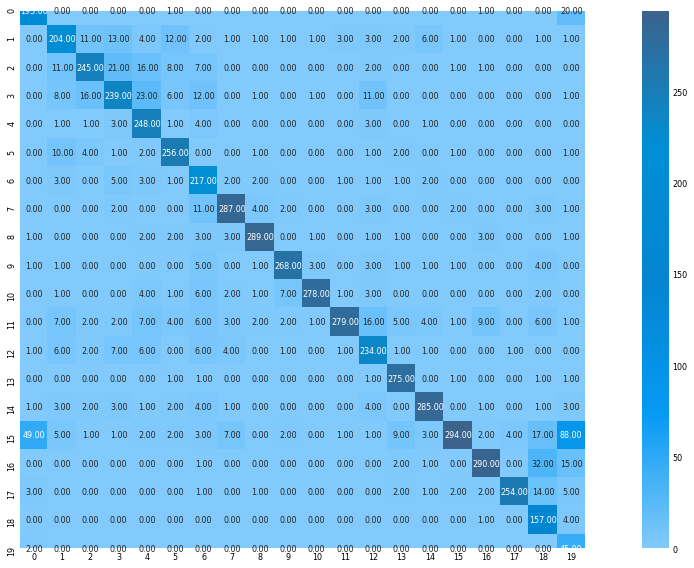

In [86]:
import seaborn.apionly as sns
cm = confusion_matrix(y,t_test)
plt.figure(figsize=(16,8))
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 8},
                 #yticklabels=idx[:n_terms],
                 #xticklabels=idx[:n_terms],
                 cmap = cmap)
plt.tight_layout()
plt.show()

In [87]:
print(classification_report(y,t_test))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       215
           1       0.78      0.76      0.77       267
           2       0.86      0.79      0.82       312
           3       0.80      0.75      0.78       318
           4       0.78      0.95      0.86       262
           5       0.86      0.92      0.89       279
           6       0.75      0.91      0.82       238
           7       0.93      0.91      0.92       315
           8       0.95      0.94      0.95       307
           9       0.95      0.93      0.94       289
          10       0.98      0.91      0.94       306
          11       0.98      0.78      0.87       357
          12       0.82      0.86      0.84       271
          13       0.91      0.98      0.95       281
          14       0.93      0.92      0.93       311
          15       0.97      0.60      0.74       491
          16       0.94      0.85      0.89       341
          17       0.98    

In [88]:
from sklearn.svm import SVC
clf_svm = SVC(kernel='rbf', class_weight='balanced', C=1e3, gamma=0.0001)

clf_svm = clf_svm.fit(X_train, t_train)
y_svm = clf_svm.predict(X_test)
print(accuracy_score(y_svm,t_test))

0.8418818535550053


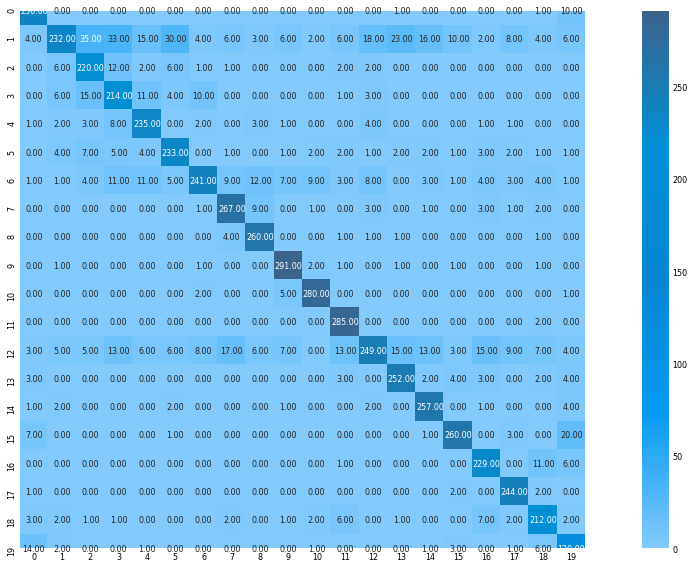

In [32]:
cm = confusion_matrix(y_svm,t_test)
plt.figure(figsize=(16,8))
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 8},
                 #yticklabels=idx[:n_terms],
                 #xticklabels=idx[:n_terms],
                 cmap = cmap)
plt.tight_layout()
plt.show()

In [32]:
# Training Support Vector Machines - SVM and calculating its performance

from sklearn.linear_model import SGDClassifier
text_clf_svm = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=15, random_state=42)

text_clf_svm = text_clf_svm.fit(X_train, t_train)
y_sgd = text_clf_svm.predict(X_test)
print(accuracy_score(y_sgd,t_test))

0.877431906615


In [33]:
text_clf_lr = SGDClassifier(loss='log', penalty='l2',alpha=1e-3, max_iter=15, random_state=42)

text_clf_lr = text_clf_lr.fit(X_train, t_train)
y_lr = text_clf_lr.predict(X_test)
print(accuracy_score(y_lr,t_test))

0.788468340998


In [34]:
# Grid Search
# Here, we are creating a list of parameters for which we would like to do performance tuning. 
# All the parameters name start with the classifier name (remember the arbitrary name we gave). 
# E.g. vect__ngram_range; here we are telling to use unigram and bigrams and choose the one which is optimal.

from sklearn.model_selection import GridSearchCV
parameters = {'alpha': (1e-2, 1e-3)}

In [36]:
# Next, we create an instance of the grid search by passing the classifier, parameters 
# and n_jobs=-1 which tells to use multiple cores from user machine.

gs_clf = GridSearchCV(text_clf_svm, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(X_red, t)

In [37]:
# To see the best mean score and the params, run the following code

gs_clf.best_score_
gs_clf.best_params_

# Output for above should be: The accuracy has now increased to ~90.6% for the NB classifier (not so naive anymore! 😄)
# and the corresponding parameters are {‘clf__alpha’: 0.01, ‘tfidf__use_idf’: True, ‘vect__ngram_range’: (1, 2)}.

{'alpha': 0.001}

In [ ]:
twenty_s = text_mnb_stemmed.transform(twenty)

In [ ]:
count_vect = CountVectorizer()
Xs_counts = count_vect.fit_transform(text_mnb_stemmed)
Xs_counts.shape